# Data Science Nigeria: Introductory Machine Learning



## INTRODUCTION TO REGRESSION


## Course Overview 

Upon completion of this study unit, you should be able to:

- Have a general understanding of how a regression algorithm works

- List types of regression algorithms 

- Build a linear regression algorithms using SKLearn

- Evaluate regression models performance 


Remember that **Machine Learning Models/ Algorithms** allows computer to automate tasks that would otherwise take manual efforts, time, as well as resources. It learns how to interpret data to provide insight to humans. **Machine Learning performance improves with experience**


## Regression 
Regression is a set of processes used to estimate relationship between variables. 

### Examples of tasks that can be solved using regression

Before a dataset can be train on a regression model, the label must be a continuous variable not discret
* Predicting salary from years of experience
* Determining Glucose level from Age of patients
* Predicting salary from years of experience
* Predicting students grade based on total study time.
* Predicting examination score based on students' test score etc.

### Regression Machine Learning Model using Mama Tee restaurant dataset

The objective of the regression task is to predict the amount of tip (gratuity in Nigeria naira) given to a food server based on total_bill, gender, smoker (whether they smoke in the party or not), day (day of the week for the party), time (time of the day whether for lunch or dinner), and size (size of the party) in Mama Tee restaurant..

**Label**: The label for this problem is tip.
    
**Features**: There are $6$ features and they include total bill, gender, smoker, day, time, and size.

We plan to use the following regression models (regressor) to predict the amount of tips that will be given during a particular party in the restaurant:

- Ordinary Least Square (OLS)

- Support Vector Machine (SVM)

- Extreme Gradient Boosting (XGBoost)

- Decision Tree

- Random Forest

# Import Python modules

We need to import some packages that will enable us to explore the data and build machine learning models

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport # Please install pandas profiling if you don't have it installed already

In [5]:
tip = pd.read_csv(r"C:\Users\HP\Desktop\AI+ Invasion -UNILAG\Data\tips.csv")

tip.head(10)

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6
5,2411.08,296.48,Female,Yes,Thur,Lunch,2
6,4607.43,374.96,Female,No,Thur,Dinner,4
7,1165.21,700.87,Female,No,Mon,Dinner,2
8,2895.04,347.71,Male,No,Sat,Dinner,5
9,2622.54,253.97,Male,Yes,Thur,Lunch,6


In [6]:
tip.shape

(744, 7)

## Relationship with categorical variables

## tip vs. gender

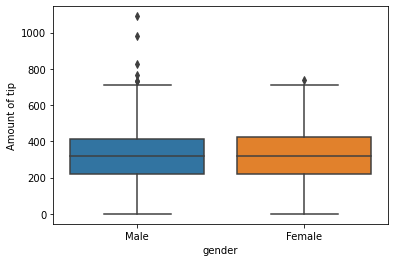

In [ ]:
sns.boxplot(x = "gender", y = "tip", data = tip)

plt.ylabel("Amount of tip");

The amount of tips given by both gender is almost the same although there was an extreme amount of tip given by some men.

## tip vs. smoker

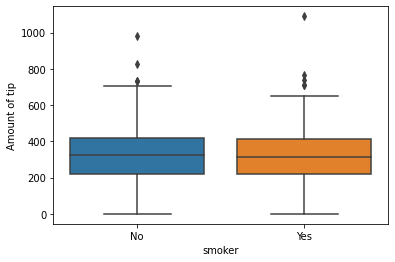

In [ ]:
sns.boxplot(x = "smoker", y = "tip", data = tip)

plt.ylabel("Amount of tip");

Smokers and non-smokers gave almost the same 
amount of tip.

## tip vs. time

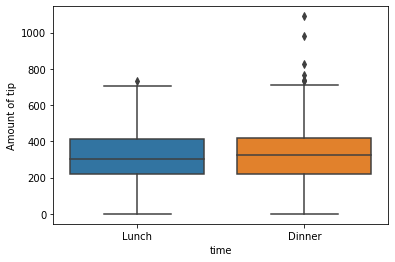

In [ ]:
sns.boxplot(x = "time", y = "tip", data = tip)

plt.ylabel("Amount of tip");



```
# This is formatted as code
```

Lunch and Dinner gave almost the same amount of tip.

# Model building

After getting some insight about the data, we can now prepare the data for machine learning modelling

- Importing machine learning models

In [8]:
from sklearn import metrics # For model evaluation

from sklearn.model_selection import train_test_split # To divide the data into training and test set

# Data Preprocessing 
- Separating features and the label from the data

Now is the time to build machine learning models for the task of predicting the amount of tip that would be given for any party in the restuarant. Therefore, we shall separate the set of features (X) from the label (Y).

In [9]:
tip.head(4)

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1


In [10]:
# split data into features and target

X = tip.drop(["tip"], axis= "columns") # dropping the label variable (tip) from the data

y = tip["tip"]

In [11]:
X.head()

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5
2,1066.02,Female,Yes,Thur,Dinner,4
3,3493.45,Female,No,Sun,Dinner,1
4,3470.56,Male,Yes,Sun,Lunch,6


In [12]:
y.head()

0    360.79
1    259.42
2    274.68
3    337.90
4    567.89
Name: tip, dtype: float64

Since the label is continuous, this is a regression task.

- One-hot encoding

As dicussed in Part 3, we need to create a one-hot encoding for all the categorical features in the data because some algorithms cannot work with categorical data directly. They require all input variables and output variables to be numeric. In this case, we will create a one-hot encoding for gender, smoker, day and time by using `pd.get_dummies()`. 

In [13]:
pd.get_dummies(X)

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,3164.27,3,0,1,1,0,0,0,1,0,0,0,0,1,0
740,2962.62,2,1,0,0,1,0,0,1,0,0,0,0,1,0
741,2471.03,2,0,1,0,1,0,0,1,0,0,0,0,1,0
742,1942.38,2,0,1,1,0,0,0,1,0,0,0,0,1,0


We now save this result of one-hot encoding into X.

In [14]:
X = pd.get_dummies(X)

In [15]:
X.head()

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1


In [16]:
X.shape

(744, 15)

- Split the data into training and test set

We will split our dataset (Features (X) and Label (Y)) into training and test data by using `train_test_split()` function from the sklearn. The training set will be $80\%$ while the test set will be $20\%$. The `random_state` that is set to 1234 is for all of us to have the same set of data.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1234)

We now have the pair of training data `(X_train, y_train)` and test data `(X_test, y_test)`

- Model training

We will use the training data to build the model and then use test data to make prediction and evaluation respectively.

## Linear Regression

Let's train a linear regression model with our training data. We need to import the Linear regression from the sklearn model

In [18]:
# Fitting Linear Regression to the Training set

from sklearn.linear_model import LinearRegression

We now create an object of class `LinearRegression` to train the model on

In [28]:
linearmodel = LinearRegression()

linearmodel.fit(X_train, y_train)

LinearRegression()

`linearmodel.fit` trained the Linear regression model. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

Let's save the prediction result into `linearmodel_prediction`. This is what the model predicted for us.

In [29]:
linearmodel_prediction = linearmodel.predict(X_test)

### Model evaluation



Since the prediction is continous, we can only measure how far the prediction is from the actual values. Let's check the error for each prediction.

In [30]:
y_test - linearmodel_prediction 

535     24.961516
718   -127.210271
277    117.118840
391     29.585975
586    -80.857463
          ...    
28     251.233516
146   -113.455516
616    159.553272
234     27.214263
359     33.720087
Name: tip, Length: 149, dtype: float64

The positive ones show that the prediction is higher than the actual values while the negative ones are below the actual values. Let's now measure this error by using the Root Mean Squared Error (RMSE).

In [31]:
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)

In [32]:
MSE

20201.41527694898

We now take the square root of the Mean Squared Error to get the value of the RMSE.

In [33]:
np.sqrt(MSE)

142.1316828752442

Therefore, the RMSE for the linear regression is 142.1316828752442.

## Random Forest Model

Let's train a Random Forest model with our training data. We need to import the model from the sklearn module

In [34]:
from sklearn.ensemble import RandomForestRegressor

randomforestmodel = RandomForestRegressor()

randomforestmodel.fit(X_train, y_train)

RandomForestRegressor()

`randomforestmodel.fit()` trained the Random Forest model on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [35]:
randomforestmodel_prediction = randomforestmodel.predict(X_test)

In [36]:
MSE = metrics.mean_squared_error(y_test, randomforestmodel_prediction)

In [37]:
MSE

25911.596681171482

We now take the square root of the Mean Squared Error to get the value of the RMSE.

In [38]:
np.sqrt(MSE)

160.97079449754693

Therefore, the RMSE for the Random Forest Model is 160.3155113080993.

## Extreme Gradient Boost (XGBoost) Model

Let's train an XGBoost model with our training data. We need to import the XGBoost model from the xgboost module.

In [39]:
from xgboost import XGBRegressor # Please install xgboost libarary if you don't have it installed already

xgboostmodel = XGBRegressor(use_label_encoder=False)

xgbboostmodel = xgboostmodel.fit(X_train, y_train)

[16:30:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




`xgboostmodel.fit()` trained the XGBoost model on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [40]:
xgbboostmodel_prediction = xgboostmodel.predict(X_test)

You can call on `xgbboostmodel_prediction` to see the prediction

In [41]:
MSE = metrics.mean_squared_error(y_test, xgbboostmodel_prediction)

In [42]:
MSE

29250.892630941566

We now take the square root of the Mean Squared Error to get the value of the RMSE.

In [43]:
np.sqrt(MSE)

171.0289233753799

Therefore, the RMSE for the Gradient Boost (XGBoost) Model is 171.0289233753799

## Support Vector Machine (SVM)

Let's train a Support Vector Machine model with our training data. We need to import the Support Vector Machine model from the sklearn module

In [44]:
from sklearn.svm import SVR

SVMmodel = SVR()

SVMmodel.fit(X_train, y_train)

SVR()

`SVMmodel.fit()` trained the Support Vector Machine on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [45]:
SVMmodel_prediction = SVMmodel.predict(X_test)

You can call on `SVMmodel_prediction` to see what has been predicted.

In [46]:
MSE = metrics.mean_squared_error(y_test, SVMmodel_prediction)

In [47]:
MSE

19853.340298954365

We now take the square root of the Mean Squared Error to get the value of the RMSE.

In [48]:
np.sqrt(MSE)

140.90188181480886

Therefore, the RMSE for the Support Vector Machine (SVM) is 140.90188181480886

You can call on `SVMmodel_prediction` to see the prediction

## Decision Tree 

Let's train a Decision Tree model with our training data. We need to import the Decision Tree model from the sklearn module

In [49]:
from sklearn.tree import DecisionTreeRegressor

decisiontree =  DecisionTreeRegressor()

decisiontree.fit(X_train, y_train)

DecisionTreeRegressor()

`decisiontree.fit()` trained the Decision Tree on the training data. The model is now ready to make prediction for the unknown label by using only the features from the test data (`X_test`).

In [50]:
decisiontree_prediction = decisiontree.predict(X_test)

You can call on `decisiontree_prediction` to see what has been predicted.

In [51]:
MSE = metrics.mean_squared_error(y_test, decisiontree_prediction)

In [52]:
MSE

44748.94924832214

We now take the square root of the Mean Squared Error to get the value of the RMSE.

In [53]:
np.sqrt(MSE)

211.53947444465805

Therefore, the RMSE for the Decision Tree is 215.84571333501313

## Models Summary

Having trained all the five (5) models, we can see that the best model that can accurately predict the amount of tips that would be given for a given party in the restaurant is the model with the lowest RMSE and that is Suport Vector Machine (SVM).

## Class Activity 

## Importing Scikit-learn Module

Use the following models to predict the amount of tips that would be given for a given party in the restuarant. Your teacher has also included how to import those models for you.

* **K Nearest Neighbor**: `from sklearn.neighbors import KNeighborsRegressor`

* **Ridge Regression**: ` from sklearn.linear_model import Ridge`

* **Gradient Boost Classifier**: `from sklearn.ensemble import GradientBoostingRegressor`

Which of the three (3) model is the best in term of RMSE?